In [1]:
import rpy2
import pandas as pd

%load_ext rpy2.ipython

In [2]:
%%R
library(Seurat)
library(Matrix)
library(ggplot2)
library(patchwork)

R[write to console]: Attaching SeuratObject



## RNA data

In [3]:
%%R
# # load RNA data
# metadata <- read.table("../mCTN/dataset/ForSeurat/Metadata.csv.gz", 
#                        sep=",", header = TRUE, row.names = 1)
# rna <- read.table("../mCTN/dataset/ForSeurat/RNA.gene_body.csv.gz", sep=",", header = TRUE, row.names=1)
# rna <- t(as(object = as.matrix(rna), Class = "dgCMatrix"))
# 
# # process RNA data
# rna.obj <- CreateSeuratObject(
#   counts = rna,
#   assay = "RNA",
#   project = "mCT",
#   meta.data = metadata,
#   min.features = 200,
#   min.cells = 10
# )

rna.obj <- readRDS('mCT.RNA.rds')

rna.obj <- rna.obj[, rna.obj$ClusterAnno != ""] # remove cells with no annotation
rna.obj <- FindVariableFeatures(rna.obj)
rna.obj <- NormalizeData(rna.obj)
rna.obj <- ScaleData(rna.obj)
rna.obj <- RunPCA(rna.obj)
rna.obj <- RunUMAP(rna.obj, reduction = "pca", dims = 1:30)

R[write to console]: Warning:
R[write to console]:  Feature names cannot have underscores ('_'), replacing with dashes ('-')

R[write to console]: Calculating gene variances
R[write to console]: 

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write 

R[write to console]: Warning:
R[write to console]:  The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session

R[write to console]: 01:14:51 UMAP embedding parameters a = 0.9922 b = 1.112

R[write to console]: 01:14:51 Read 3896 rows and found 30 numeric columns

R[write to console]: 01:14:51 Using Annoy for neighbor search, n_neighbors = 30

R[write to console]: 01:14:51 Building Annoy index with metric = cosine, n_trees = 50

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R

## mCH data

In [4]:
%%R
# hchn.frac <- read.table("../mCTN/dataset/ForSeurat/mC.HCHN.fraction.csv.gz", sep=",", header = TRUE, row.names=1)
# hchn.frac <- t(as(object = as.matrix(hchn.frac), Class = "dgCMatrix"))
# 
# # mCH data
# mc.obj <- CreateSeuratObject(
#   counts = -hchn.frac,
#   assay = "mC",
#   project = "mC",
#   meta.data = metadata
# )
mc.obj <- readRDS('mCT.mCH_reverse.rds')

# remove cells with no annotation
mc.obj  <- mc.obj[, mc.obj$ClusterAnno != ""]

R[write to console]: Warning:
R[write to console]:  Feature names cannot have underscores ('_'), replacing with dashes ('-')



In [5]:
%%R
# don't log-normalize
# use variable features from RNA
genes.use <- intersect(VariableFeatures(rna.obj), rownames(mc.obj))
mc.obj <- ScaleData(mc.obj, features = genes.use)
mc.obj <- RunPCA(mc.obj, features = genes.use)
mc.obj <- RunUMAP(mc.obj, reduction = "pca", dims = 1:30)

R[write to console]: Centering and scaling data matrix

  |                                                                            
  |                                                                      |   0%
  |                                                                            
  |===================================                                   |  50%
  |                                                                            
  |======================================================================| 100%
R[write to console]: 

R[write to console]: PC_ 1 
Positive:  ENSG00000078549.14-4, ENSG00000178568.14-4, ENSG00000110693.17-4, ENSG00000151789.10-3, ENSG00000172987.12-3, ENSG00000153012.11-3, ENSG00000122584.12-2, ENSG00000196632.10-4, ENSG00000175984.14-3, ENSG00000171189.17-4 
	   ENSG00000231304.2-4, ENSG00000283341.1-4, ENSG00000005187.11-3, ENSG00000167858.12-2, ENSG00000105173.13-4, ENSG00000188517.15-4, ENSG00000173210.19-2, ENSG00000180287.16-3, ENSG

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: |

R[write to console]: 01:21:28 Writing NN index file to temp file /tmp/Rtmph5dsvM/file1a2664eed941e

R[write to console]: 01:21:28 Searching Annoy index using 1 thread, search_k = 3000

R[write to console]: 01:21:29 Annoy recall = 100%

R[write to console]: 01:21:29 Commencing smooth kN

## Find Anchors

In [6]:
%%R
anchors.ch <- FindTransferAnchors(
  reference = rna.obj,
  query = mc.obj,
  features = genes.use,
  normalization.method = "LogNormalize",
  reduction = "cca"
)

R[write to console]: Running CCA

R[write to console]: Merging objects

R[write to console]: Finding neighborhoods

R[write to console]: Finding anchors

R[write to console]: 	Found 8921 anchors

R[write to console]: Filtering anchors

R[write to console]: 	Retained 4101 anchors



## Coimbedding

In [7]:
%%R
pred.rna.ch <- TransferData(
  anchorset = anchors.ch,
  refdata = GetAssayData(rna.obj, assay = "RNA", slot = "data"),
  weight.reduction = mc.obj[["pca"]],
  dims = 1:30
)

mc.obj[["RNA"]] <- pred.rna.ch
mc.obj$modality <- "mCH"
rna.obj$modality <- "RNA"

combined <- merge(mc.obj, rna.obj)
DefaultAssay(combined) <- "RNA"
VariableFeatures(combined) <- VariableFeatures(rna.obj)
combined <- ScaleData(combined, do.scale = FALSE)
combined <- RunPCA(combined)
combined <- RunUMAP(combined, reduction = "pca", dims = 1:30)

p3 <- DimPlot(combined, group.by = "modality")
p4 <- DimPlot(combined, group.by = "ClusterAnno", label = TRUE) + NoLegend()

R[write to console]: Finding integration vectors

R[write to console]: Finding integration vector weights

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[writ

R[write to console]: 01:23:33 UMAP embedding parameters a = 0.9922 b = 1.112

R[write to console]: 01:23:33 Read 7794 rows and found 30 numeric columns

R[write to console]: 01:23:33 Using Annoy for neighbor search, n_neighbors = 30

R[write to console]: 01:23:33 Building Annoy index with metric = cosine, n_trees = 50

R[write to console]: 0%   10   20   30   40   50   60   70   80   90   100%

R[write to console]: [----|----|----|----|----|----|----|----|----|----|

R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *
R[write to console]: *

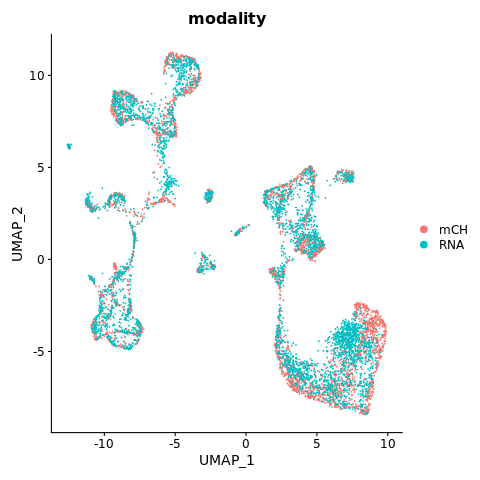

In [8]:
%%R
p3

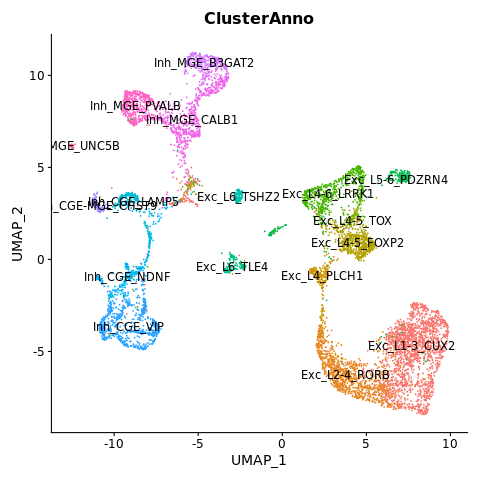

In [9]:
%%R
p4

In [10]:
%%R -o pc
pc <- combined[['pca']][[1:7792, 1:50]]

In [11]:
import pandas as pd
pd.DataFrame(pc).to_hdf('Seurat.integrated.PCs.hdf', key='data')

In [12]:
%%R
sessionInfo()

R version 4.0.3 (2020-10-10)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /home/hanliu/miniconda3/envs/allcools/lib/libopenblasp-r0.3.12.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] tools     stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] patchwork_1.1.1    ggplot2_3.3.3      Matrix_1.3-2       SeuratObject_4.0.0
[5] Seurat_4.0.0      

loaded via a namespace (and not attached):
 [1] nlme_3.1-151         matrixStats_0.58.0   RcppAnnoy_0.0.18    
 [4] RColorBrewer_1.1-2   httr_1.4.2           sctransform_0.3.2   
 [